<a href="https://colab.research.google.com/github/oksuzian/Mu2eANL/blob/master/Macros/BackgroundEstimator.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Init and cuts definition

In [90]:
import sys
import matplotlib.pyplot as plt
import pandas as pd
h5file='drive/MyDrive/root_files_cry4/cry4df.h5'

# This allows you to run on Colaboratory and load files from your Google Drive
try:
    from google.colab import drive
    drive.mount("/content/drive")
    main_path = '/content/drive/MyDrive/'
except:
    main_path = ''
sys.path.append(main_path)
sys.path.append(main_path+'root_files_cry4')
from utils import Utils
util = Utils()
import math

plt.style.use('seaborn-whitegrid')
plt.rcParams["grid.linestyle"] = (5,15)
plt.rcParams["grid.linewidth"] = 0.5
plt.rcParams["figure.figsize"] = (10,5)
plt.rcParams.update({'font.size': 22})

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [15]:
#Default MDC-style cut box
cuts = [
    "(de_status > 0)",
    "(deent_td > 0.577350)",
    "(deent_td < 1.000)",
    "(deent_d0 > -80)",
    "(deent_d0 < 105)",
    "((deent_d0 + 2./deent_om) > 450)",
    "((deent_d0 + 2./deent_om) < 680)",
    "(is_triggered)"
]
cut_tbox = " & ".join(cuts)

#PID, TrkQual and cut on events with an usptream leg
cuts = [
    "(dequal_TrkQual > 0.8)",
    "(dequal_TrkPID > 0.95)",
    "(ue_status <= 0)"
]
cut_pid_trkqual_ue = " & ".join(cuts)

# Extended momentum window cut`
cuts = [
    "(deent_mom > 100)",
    "(deent_mom < 110)"
]
cut_extmom = " & ".join(cuts)

# Loose box cuts
cuts = [
    "(deent_td > 0.577350)",
    "(deent_td < 1.000)",
    "(deent_d0 > -80)",
    "(deent_d0 < 205)",
    "((deent_d0 + 2./deent_om) > 450)",
    "(is_triggered)"
]
cut_lbox = " & ".join(cuts)

crv_time = "( crvinfo__dT < -150.0 | crvinfo__dT > 50)"
#Combime cuts
cut_nomom  = cut_tbox +" & "+cut_pid_trkqual_ue
cut_extmom = cut_tbox +" & "+cut_pid_trkqual_ue+" & "+cut_extmom
cut_loose  = cut_lbox +" & "+cut_pid_trkqual_ue

#Load dataframe

In [3]:
df = pd.read_hdf(h5file, mode='r')

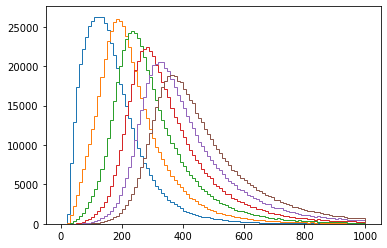

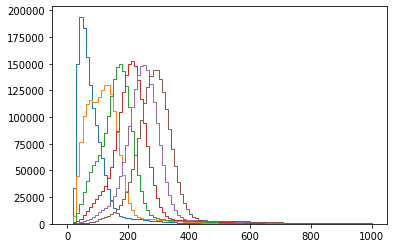

In [4]:
for l in range(7000,17001,2000):
  plt.hist(df.query('is_high==1 & lyield==%i' % l)['crvinfo__PEs'], bins=100, range=(0, 1000), histtype='step');
plt.figure()
for l in range(7000,17001,2000):
  plt.hist(df.query('is_high==0 & lyield==%i' % l)['crvinfo__PEs'], bins=100, range=(0, 1000), histtype='step');

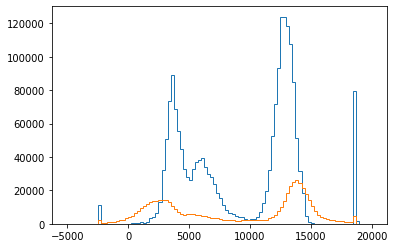

In [5]:
plt.hist(df.query('is_high==0 & lyield==%i' % 17000)['_z'], bins=100, range=(-5000, 20000), histtype='step');
plt.hist(df.query('is_high==1 & lyield==%i' % 17000)['_z'], bins=100, range=(-5000, 20000), histtype='step');

In [6]:
util = Utils()
util.pritnLiveTimes()

LIVETIME_MU2E: 3.460000e+06
LIVETIME_HI: 5.490000e+06
LIVETIME_LO: 1.869000e+08


In [80]:
def plot_background(cut_query, title, altitude_scale, log_scale=True, make_plot=True):

  lyield_scale=0.001726
  bg_ave = []
  pe_ave = []
  bg_err = []
  print(title)

  for ly in range(7000,17001,2000):
    bg = util.getNormBackground(df, cut_query+" & lyield =="+str(ly), 1)
    bg_ave.append(bg[0]*altitude_scale)
    pe_ave.append(ly*lyield_scale)
    bg_err.append(bg[1]*math.sqrt(altitude_scale))
    print("PE: %.1f, bg: %3.4f, err: %3.4f" % (ly*lyield_scale, bg[0], bg[1]))

  plt.errorbar(pe_ave, bg_ave, yerr=bg_err, fmt='.k');
  plt.title(title)
  if log_scale:
    plt.yscale('log')
  return (bg_ave, pe_ave, bg_err)

Muons inside CRV
PE: 12.1, bg: 12.7734, err: 0.3000
PE: 15.5, bg: 2.3921, err: 0.1183
PE: 19.0, bg: 0.3963, err: 0.0372
PE: 22.4, bg: 0.0796, err: 0.0136
PE: 25.9, bg: 0.0511, err: 0.0181
PE: 29.3, bg: 0.0208, err: 0.0127
Neutrons
PE: 12.1, bg: 0.0292, err: 0.0033
PE: 15.5, bg: 0.0267, err: 0.0031
PE: 19.0, bg: 0.0267, err: 0.0031
PE: 22.4, bg: 0.0285, err: 0.0032
PE: 25.9, bg: 0.0281, err: 0.0032
PE: 29.3, bg: 0.0285, err: 0.0032
Muons outside CRV
PE: 12.1, bg: 0.0200, err: 0.0027
PE: 15.5, bg: 0.0089, err: 0.0018
PE: 19.0, bg: 0.0081, err: 0.0017
PE: 22.4, bg: 0.0085, err: 0.0018
PE: 25.9, bg: 0.0093, err: 0.0019
PE: 29.3, bg: 0.0078, err: 0.0017


Text(0, 0.5, 'Background for Run-1')

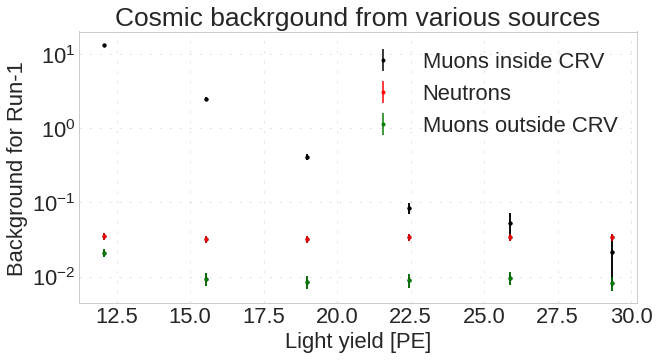

In [93]:
cut_query = cut_nomom+" & "+crv_time
title='Muons inside CRV'
bg_ave, pe_ave, bg_err = plot_background(cut_query+" & _crvSectorType > 0 & abs(demcgen_pdg) == 13", title, 1.05, False, False)
plt.errorbar(pe_ave, bg_ave, yerr=bg_err, fmt='.k', label=title)

title = 'Neutrons'
bg_ave, pe_ave, bg_err = plot_background(cut_query+" & demcgen_pdg == 2112", title, 1.2, False, False)
plt.errorbar(pe_ave, bg_ave, yerr=bg_err, fmt='.r', label=title)

title = 'Muons outside CRV'
bg_ave, pe_ave, bg_err = plot_background(cut_query+" & _crvSectorType < 0 & abs(demcgen_pdg) == 13", title, 1.05, False, False)
plt.errorbar(pe_ave, bg_ave, yerr=bg_err, fmt='.g', label=title)
plt.legend()
plt.yscale('log');
plt.title('Cosmic backrgound from various sources');
plt.xlabel('Light yield [PE]')
plt.ylabel('Background for Run-1')

Background from muons inside the fiducial CRV region
PE: 12.1, bg: 12.7734, err: 0.3000
PE: 15.5, bg: 2.3921, err: 0.1183
PE: 19.0, bg: 0.3963, err: 0.0372
PE: 22.4, bg: 0.0796, err: 0.0136
PE: 25.9, bg: 0.0511, err: 0.0181
PE: 29.3, bg: 0.0208, err: 0.0127
Background from muons outside of fiducial CRV region
PE: 12.1, bg: 0.0200, err: 0.0027
PE: 15.5, bg: 0.0089, err: 0.0018
PE: 19.0, bg: 0.0081, err: 0.0017
PE: 22.4, bg: 0.0085, err: 0.0018
PE: 25.9, bg: 0.0093, err: 0.0019
PE: 29.3, bg: 0.0078, err: 0.0017
Background from neutrons
PE: 12.1, bg: 0.0292, err: 0.0033
PE: 15.5, bg: 0.0267, err: 0.0031
PE: 19.0, bg: 0.0267, err: 0.0031
PE: 22.4, bg: 0.0285, err: 0.0032
PE: 25.9, bg: 0.0281, err: 0.0032
PE: 29.3, bg: 0.0285, err: 0.0032


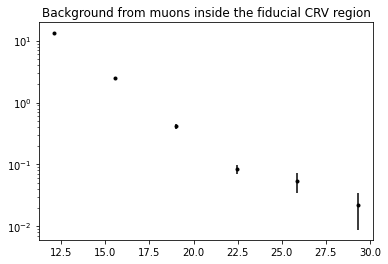

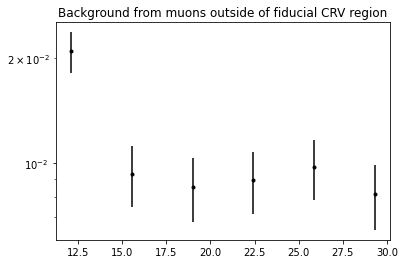

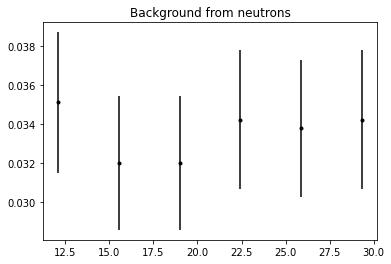

In [88]:
cut_query = cut_nomom+" & "+crv_time
title='Background from muons inside the fiducial CRV region'
plot_background(cut_query+" & _crvSectorType > 0 & abs(demcgen_pdg) == 13", title, 1.05)

plt.figure()
title = 'Background from muons outside of fiducial CRV region'
plot_background(cut_query+" & _crvSectorType < 0 & abs(demcgen_pdg) == 13", title, 1.05)

plt.figure()
title = 'Background from neutrons'
plot_background(cut_query+" & demcgen_pdg == 2112", title, 1.2, False);